# Generating the sample data

In [6]:
import torch

# Sample dataset (X: input, y: labels)
X = torch.tensor([[1.0, 0.5],
                  [0.9, 0.7],
                  [0.4, 0.6],
                  [0.3, 0.4],
                  [1.1, 0.8],
                  [0.6, 0.9]], dtype=torch.float32)

y = torch.tensor([[1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [0, 1]], dtype=torch.float32)

print("X")
print(type(X)) 
print(X)
print("\ny")
print(type(y))
print(y)

X
<class 'torch.Tensor'>
tensor([[1.0000, 0.5000],
        [0.9000, 0.7000],
        [0.4000, 0.6000],
        [0.3000, 0.4000],
        [1.1000, 0.8000],
        [0.6000, 0.9000]])

y
<class 'torch.Tensor'>
tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.]])


# Standardization + Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

print("X")
print(type(X))
print(X)

# Z-score Scaling (Standardization) data to have mean = 0 and std = 1
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(X)
print("\ndata_standardized")
print(type(data_standardized))
print(data_standardized)

# Min-Max Scaling (Normalization)  want values scaled to a specific range
min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data_standardized)
print("\ndata_normalized")
print(type(data_normalized))
print(data_normalized)

X = torch.tensor(data_normalized, dtype=torch.float32)
print("\nX")
print(type(X))
print(X)

X
<class 'torch.Tensor'>
tensor([[1.0000, 0.5000],
        [0.9000, 0.7000],
        [0.4000, 0.6000],
        [0.3000, 0.4000],
        [1.1000, 0.8000],
        [0.6000, 0.9000]])

data_standardized
<class 'numpy.ndarray'>
[[ 0.93724032 -0.87831011]
 [ 0.60644953  0.29276996]
 [-1.04750392 -0.2927699 ]
 [-1.37829461 -1.46385014]
 [ 1.26803111  0.87831017]
 [-0.38592244  1.46385003]]

data_normalized
<class 'numpy.ndarray'>
[[0.87499997 0.2       ]
 [0.74999994 0.6       ]
 [0.12499999 0.40000006]
 [0.         0.        ]
 [1.         0.80000006]
 [0.37500001 1.        ]]

X
<class 'torch.Tensor'>
tensor([[0.8750, 0.2000],
        [0.7500, 0.6000],
        [0.1250, 0.4000],
        [0.0000, 0.0000],
        [1.0000, 0.8000],
        [0.3750, 1.0000]])


# Creating the model

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 3)  # First layer (2 inputs, 3 neurons)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(3, 2)  # Output layer (3 inputs, 2 output)
        self.act2 = nn.Sigmoid()

    def forward(self, x):
        # model.state_dict() returns the state of the model from where we can get all the parameters and other model related info.
        initial_params = self.state_dict()

        # Print parameters
        for name, param in initial_params.items():
          print(f"\nParameters of {name}: \n{param}\n")

        x = self.fc1(x)
        print(f"\nActivation after first hidden layer: \n{x}")  # Print activations of the first layer
        x = self.act1(x)
        print(f"\nNon linearity after first Relu layer: \n{x}")  # Print non linearity of the first layer
        x = self.fc2(x)
        print(f"\nActivation after second output layer: \n{x}")  # Print activations of the second layer
        x = self.act2(x)
        print(f"\nOutput after second output layer (sigmoid): \n{x}")  # Print output of the model
        return x

# Instantiate model, loss function, and optimizer
model = SimpleNN()
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)
print("Model created successfully")

Model created successfully


# Training & evaluation

In [9]:
# Training loop
print('X :\n', X)
print('y :\n', y)

no_of_epoch = 10

for epoch in range(no_of_epoch):  # Just 3 epochs for illustration
    print(f"\n\n\n\nEpoch {epoch+1}:")
    model.train()  # Set the model to training mode

    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Print loss for tracking
    print(f"\nEpoch [{epoch+1}/{no_of_epoch}], Loss(item): {loss.item()}, Loss: {loss}")

    # Zero gradients before the backward pass
    optimizer.zero_grad()

    # Backward pass (computing gradients)
    loss.backward()

    # Print gradients for each layer
    for name, param in model.named_parameters():
        if param.grad is not None:
            print(f"\nGradient of {name} after backward pass: \n{param.grad}")

    # Print weights before the update
    for name, param in model.named_parameters():
        print(f"\nWeights of {name} before update: \n{param.data}")

    # Update weights
    optimizer.step()

    # Print weights after the update
    for name, param in model.named_parameters():
        print(f"\nWeights of {name} after update: \n{param.data}")

X :
 tensor([[0.8750, 0.2000],
        [0.7500, 0.6000],
        [0.1250, 0.4000],
        [0.0000, 0.0000],
        [1.0000, 0.8000],
        [0.3750, 1.0000]])
y :
 tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.]])




Epoch 1:

Parameters of fc1.weight: 
tensor([[ 0.4259,  0.3217],
        [-0.3262,  0.5951],
        [ 0.0214, -0.1681]])


Parameters of fc1.bias: 
tensor([-0.5900, -0.5869,  0.2450])


Parameters of fc2.weight: 
tensor([[ 0.2627,  0.3793, -0.1927],
        [ 0.0893, -0.3822,  0.3059]])


Parameters of fc2.bias: 
tensor([-0.4352,  0.5357])


Activation after first hidden layer: 
tensor([[-0.1531, -0.7534,  0.2301],
        [-0.0776, -0.4745,  0.1601],
        [-0.4081, -0.3897,  0.1804],
        [-0.5900, -0.5869,  0.2450],
        [ 0.0932, -0.4371,  0.1319],
        [-0.1087, -0.1142,  0.0849]], grad_fn=<AddmmBackward0>)

Non linearity after first Relu layer: 
tensor([[0.0000, 0.0000, 0.2301],
        [0.000

# Mini Batch gradient descent

Epoch [1/6000], Train Loss: 0.6258, Test Loss: 0.5080
Epoch [2/6000], Train Loss: 0.6253, Test Loss: 0.5067
Epoch [3/6000], Train Loss: 0.6243, Test Loss: 0.5060
Epoch [4/6000], Train Loss: 0.6238, Test Loss: 0.5052
Epoch [5/6000], Train Loss: 0.6231, Test Loss: 0.5043
Epoch [6/6000], Train Loss: 0.6225, Test Loss: 0.5035
Epoch [7/6000], Train Loss: 0.6219, Test Loss: 0.5027
Epoch [8/6000], Train Loss: 0.6213, Test Loss: 0.5020
Epoch [9/6000], Train Loss: 0.6206, Test Loss: 0.5013
Epoch [10/6000], Train Loss: 0.6200, Test Loss: 0.5006
Epoch [11/6000], Train Loss: 0.6197, Test Loss: 0.4996
Epoch [12/6000], Train Loss: 0.6190, Test Loss: 0.4986
Epoch [13/6000], Train Loss: 0.6182, Test Loss: 0.4979
Epoch [14/6000], Train Loss: 0.6177, Test Loss: 0.4972
Epoch [15/6000], Train Loss: 0.6170, Test Loss: 0.4965
Epoch [16/6000], Train Loss: 0.6165, Test Loss: 0.4958
Epoch [17/6000], Train Loss: 0.6159, Test Loss: 0.4951
Epoch [18/6000], Train Loss: 0.6155, Test Loss: 0.4944
Epoch [19/6000], Tr

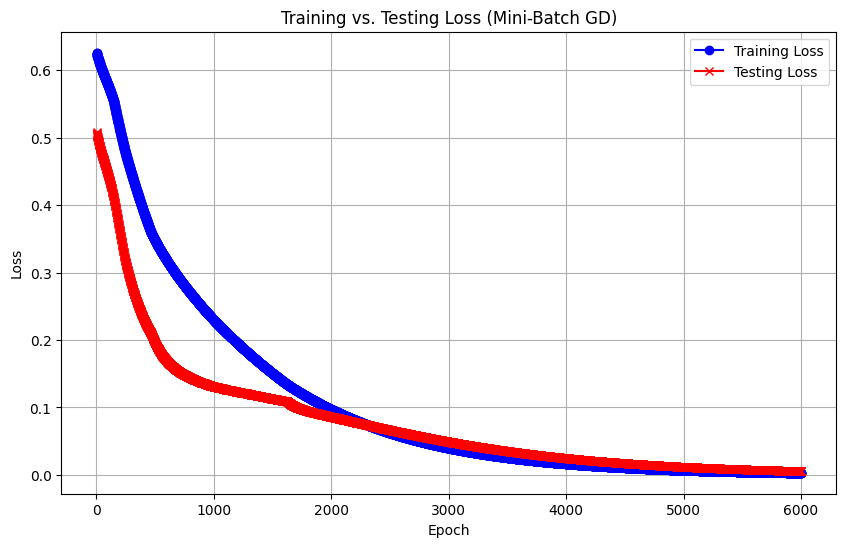

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
torch.manual_seed(42)

# Sample dataset
X = torch.tensor([[1.0, 0.5],
                  [0.9, 0.7],
                  [0.4, 0.6],
                  [0.3, 0.4],
                  [1.1, 0.8],
                  [0.6, 0.9]], dtype=torch.float32)

#y = torch.tensor([[1, 1], [1, 0], [0, 1], [0, 0], [1, 1], [0, 0]], dtype=torch.float32)
y = torch.tensor([[1, 1], [1, 1], [0, 1], [0, 0], [1, 1], [1, 1]], dtype=torch.float32)

# Scaling the data
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(X)

min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data_standardized)

# Convert to PyTorch tensors
X = torch.tensor(data_normalized, dtype=torch.float32)
y = y.clone().detach().float()

# Splitting into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DataLoader for mini-batch gradient descent
batch_size = 2  # Adjust batch size here
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(3, 2)
        self.act2 = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        return x

# Instantiate model, loss function, and optimizer
model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with Mini-Batch Gradient Descent
no_of_epoch = 6000
train_loss_history = []
test_loss_history = []

for epoch in range(no_of_epoch):
    model.train()
    running_loss = 0.0

    # Mini-batch training loop
    for batch_X, batch_y in train_loader:
        # Optimizer gradients are zero till now so that gradient are calculated only for current batch
        optimizer.zero_grad()

        # Forward pass
        outputs_train = model(batch_X)
        train_loss = criterion(outputs_train, batch_y)

        # Backward pass compute gradients
        train_loss.backward()

        # Optimizer update weights
        optimizer.step()

        running_loss += train_loss.item()

    # Store the average training loss
    avg_train_loss = running_loss / len(train_loader)
    train_loss_history.append(avg_train_loss)

    # Testing phase (without gradient calculation)
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs_test = model(batch_X)
            batch_test_loss = criterion(outputs_test, batch_y)
            test_loss += batch_test_loss.item()

    avg_test_loss = test_loss / len(test_loader)
    test_loss_history.append(avg_test_loss)

    # Print progress
    print(f"Epoch [{epoch + 1}/{no_of_epoch}], "
          f"Train Loss: {avg_train_loss:.4f}, "
          f"Test Loss: {avg_test_loss:.4f}")

# Plotting the Training and Testing Error
plt.figure(figsize=(10, 6))
plt.plot(range(1, no_of_epoch + 1), train_loss_history, label='Training Loss', color='blue', marker='o')
plt.plot(range(1, no_of_epoch + 1), test_loss_history, label='Testing Loss', color='red', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Testing Loss (Mini-Batch GD)')
plt.grid(True)
plt.legend()
plt.show()


# With data of size 40 x 1

Epoch [1/100], Train Loss: 0.7574, Test Loss: 0.6318
Epoch [2/100], Train Loss: 0.7568, Test Loss: 0.6320
Epoch [3/100], Train Loss: 0.7563, Test Loss: 0.6321
Epoch [4/100], Train Loss: 0.7557, Test Loss: 0.6322
Epoch [5/100], Train Loss: 0.7552, Test Loss: 0.6324
Epoch [6/100], Train Loss: 0.7546, Test Loss: 0.6325
Epoch [7/100], Train Loss: 0.7541, Test Loss: 0.6327
Epoch [8/100], Train Loss: 0.7536, Test Loss: 0.6328
Epoch [9/100], Train Loss: 0.7531, Test Loss: 0.6330
Epoch [10/100], Train Loss: 0.7525, Test Loss: 0.6331
Epoch [11/100], Train Loss: 0.7520, Test Loss: 0.6333
Epoch [12/100], Train Loss: 0.7515, Test Loss: 0.6334
Epoch [13/100], Train Loss: 0.7510, Test Loss: 0.6336
Epoch [14/100], Train Loss: 0.7505, Test Loss: 0.6338
Epoch [15/100], Train Loss: 0.7500, Test Loss: 0.6339
Epoch [16/100], Train Loss: 0.7496, Test Loss: 0.6341
Epoch [17/100], Train Loss: 0.7491, Test Loss: 0.6343
Epoch [18/100], Train Loss: 0.7486, Test Loss: 0.6344
Epoch [19/100], Train Loss: 0.7481, T

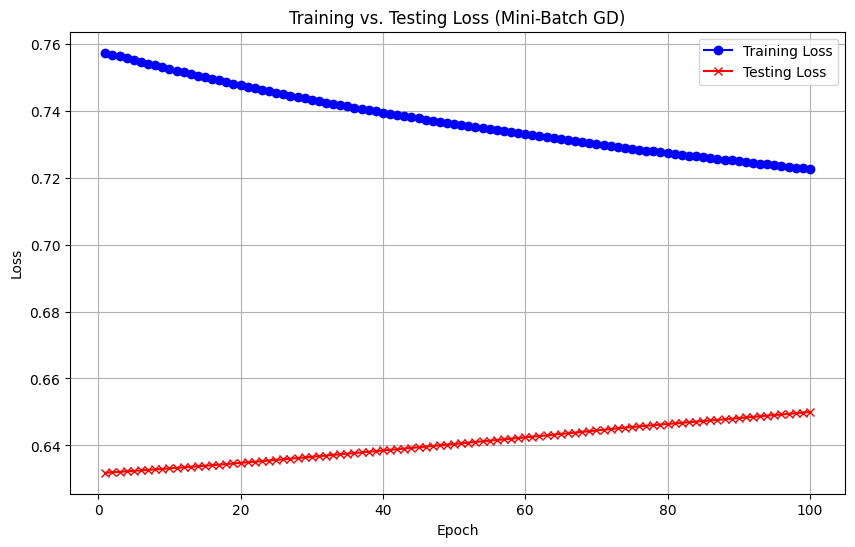

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
torch.manual_seed(42)

import torch

# Hard-coded dataset with 40 data points
X = torch.tensor([
    [1.0, 0.5], [0.9, 0.7], [0.4, 0.6], [0.3, 0.4], [1.1, 0.8],
    [0.6, 0.9], [1.2, 0.4], [0.5, 1.0], [0.7, 0.3], [1.3, 0.6],
    [0.8, 1.1], [1.0, 0.4], [0.2, 0.5], [1.4, 0.7], [0.3, 0.8],
    [0.9, 0.6], [1.5, 0.2], [0.7, 0.9], [0.6, 1.2], [1.3, 0.5],
    [0.4, 1.0], [1.1, 0.3], [0.8, 0.7], [1.2, 0.9], [0.5, 0.4],
    [1.0, 0.6], [0.3, 0.7], [0.9, 0.5], [1.4, 1.0], [0.2, 0.3],
    [1.1, 0.7], [0.4, 0.9], [1.3, 0.8], [0.6, 0.5], [1.5, 0.4],
    [0.7, 1.0], [1.0, 0.2], [0.8, 0.6], [1.2, 0.3], [0.5, 0.8]
], dtype=torch.float32)

y = torch.tensor([
    [1, 0], [0, 1], [1, 0], [0, 1], [1, 1],
    [0, 0], [1, 0], [0, 1], [1, 1], [0, 0],
    [1, 0], [0, 1], [1, 1], [0, 0], [1, 0],
    [0, 1], [1, 1], [0, 0], [1, 0], [0, 1],
    [1, 1], [0, 0], [1, 0], [0, 1], [1, 1],
    [0, 0], [1, 0], [0, 1], [1, 1], [0, 0],
    [1, 0], [0, 1], [1, 1], [0, 0], [1, 0],
    [0, 1], [1, 1], [0, 0], [1, 0], [0, 1]
], dtype=torch.float32)

# Normalize the labels to sum to 1
#y_sum = y.sum(dim=1, keepdim=True)  # Sum along rows
#y = y / y_sum


# Scaling the data
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(X)

min_max_scaler = MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data_standardized)

# Convert to PyTorch tensors
X = torch.tensor(data_normalized, dtype=torch.float32)
y = y.clone().detach().float()

# Splitting into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DataLoader for mini-batch gradient descent
batch_size = 40  # Adjust batch size here
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 3)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(3, 2)
        self.act2 = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        return x

# Instantiate model, loss function, and optimizer
model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with Mini-Batch Gradient Descent
no_of_epoch = 100
train_loss_history = []
test_loss_history = []

for epoch in range(no_of_epoch):
    model.train()
    running_loss = 0.0

    # Mini-batch training loop
    for batch_X, batch_y in train_loader:
        # Optimizer gradients are zero till now so that gradient are calculated only for current batch
        optimizer.zero_grad()

        # Forward pass
        outputs_train = model(batch_X)
        train_loss = criterion(outputs_train, batch_y)

        # Backward pass compute gradients
        train_loss.backward()

        # Optimizer update weights
        optimizer.step()

        running_loss += train_loss.item()

    # Store the average training loss
    avg_train_loss = running_loss / len(train_loader)
    train_loss_history.append(avg_train_loss)

    # Testing phase (without gradient calculation)
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs_test = model(batch_X)
            batch_test_loss = criterion(outputs_test, batch_y)
            test_loss += batch_test_loss.item()

    avg_test_loss = test_loss / len(test_loader)
    test_loss_history.append(avg_test_loss)

    # Print progress
    print(f"Epoch [{epoch + 1}/{no_of_epoch}], "
          f"Train Loss: {avg_train_loss:.4f}, "
          f"Test Loss: {avg_test_loss:.4f}")

# Plotting the Training and Testing Error
plt.figure(figsize=(10, 6))
plt.plot(range(1, no_of_epoch + 1), train_loss_history, label='Training Loss', color='blue', marker='o')
plt.plot(range(1, no_of_epoch + 1), test_loss_history, label='Testing Loss', color='red', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Testing Loss (Mini-Batch GD)')
plt.grid(True)
plt.legend()
plt.show()
